# Image Processing Project2
## Zhongyi Jiang

### This project will address the problem of "denoising" images with different methods.  Besides the particular tasks listed, the student will need to find data that extends the datasets provides, quantify noise levels in images (relative to a noiseless "ground truth"), produce sets of noisy images with known/documented noise characteristics.   For all of the methods described the student should experiment with parameters and different data/images and comment on the results and how it relates to the methodology




* Regarding the NN part of the project, there are suggestions/hints of architectures to try in the example code, however you should also try some of your own ideas for architectures and document how they performed.     

* For libraries, please use only the follow (that's all you need):  skimage, numpy, matplotlib, pandas,  pytorch, random, argparse.  Please do not use open-cv, it makes it harder to grade/evaluate your work.

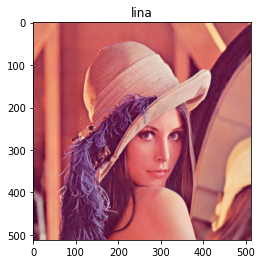

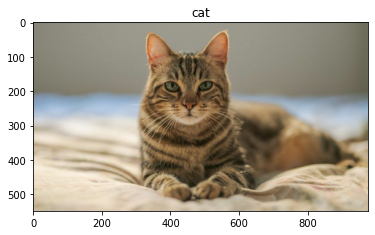

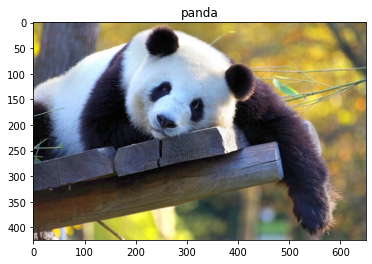

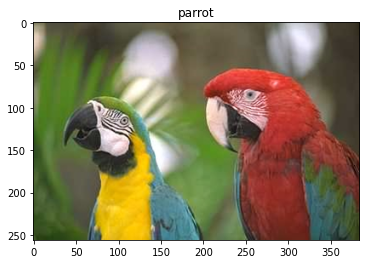

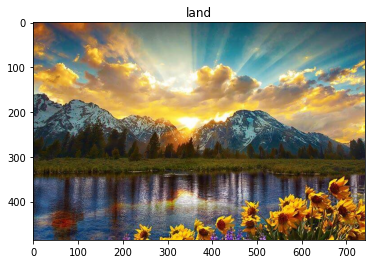

In [1]:
# Basic set up, open image show image
import skimage
from skimage import io
from skimage import color
from skimage import exposure
from skimage.util import random_noise
from skimage.filters import gaussian
from skimage.filters import median
from skimage.filters import correlate_sparse
from skimage.segmentation import flood, flood_fill
import matplotlib.pyplot as plt
import numpy as np 
# Function for converting rgb to grayscale, value range from 0 to 255
def color2gray(img):
    weights = [.3, .6, .1]
    return np.dot(img[...,:3], weights)

# Read an image (replace dog.png with the path to your rgb image)
img = io.imread("lena.png")
cat = io.imread("cat.png")
panda = io.imread("panda.jpg")
parrot = io.imread("parrot.jpg")
land = io.imread("land.jpg")

# Show the image
plt.imshow(img)
plt.title("lina")
plt.show()

plt.imshow(cat)
plt.title("cat")
plt.show()

plt.imshow(panda)
plt.title("panda")
plt.show()

plt.imshow(parrot)
plt.title("parrot")
plt.show()

plt.imshow(land)
plt.title("land")
plt.show()

img = color2gray(img)
cat = color2gray(cat)
panda = color2gray(panda)
parrot = color2gray(parrot)
land = color2gray(land)


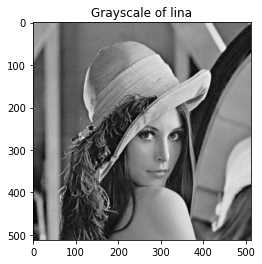

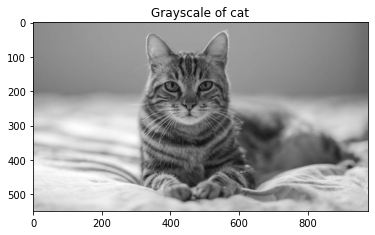

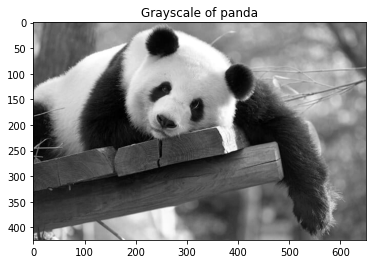

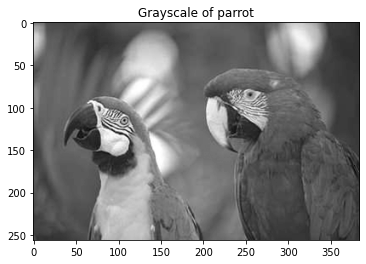

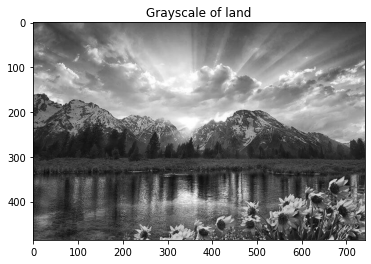

In [2]:
img = np.true_divide(img, 256)
cat = np.true_divide(cat, 256)
panda = np.true_divide(panda, 256)
parrot = np.true_divide(parrot, 256)
land = np.true_divide(land,256)

# show gray image
plt.imshow(img, cmap="gray")
plt.title("Grayscale of lina")
plt.show()

plt.imshow(cat, cmap="gray")
plt.title("Grayscale of cat")
plt.show()

plt.imshow(panda, cmap="gray")
plt.title("Grayscale of panda")
plt.show()

plt.imshow(parrot, cmap="gray")
plt.title("Grayscale of parrot")
plt.show()

plt.imshow(land, cmap="gray")
plt.title("Grayscale of land")
plt.show()



### Part1: Build and experiment with several different linear filters (also different sizes) using correlation/convolution.  Quantify (e.g. using MSE) their effectiveness (and compare quantitatively and qualitatively) with different levels of noise, types of noise, and images.

Some helper functions: 
* Add noise to the graph
* Evaluate MSE

In [3]:
def noiseAddtion(image,noiseIndicator):
    if noiseIndicator == 0: # gaussian noise
        return random_noise(image, mode='gaussian', seed=None, mean=0, var=0.02)
    elif noiseIndicator == 1: # salt and pepper
        return random_noise(image, mode='s&p', seed=None, clip=True, salt_vs_pepper=0.08)
    elif noiseIndicator == 2: # Possion noise
        return random_noise(image, mode='poisson', seed=None, clip=True)
    elif noiseIndicator == 3: # Speckle noise
        return random_noise(image, mode='speckle', seed=None, clip=True)
    else:
        print("Unknown indicator")
        return image
def Evaluate_MSE(image1,image2):
    diff = image1-image2
    diff_square = diff**2
    sum = np.sum(diff_square)
    return sum/(image1.shape[0]*image1.shape[1])

Test different noise pattern

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


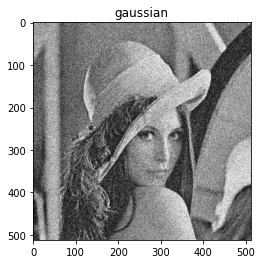

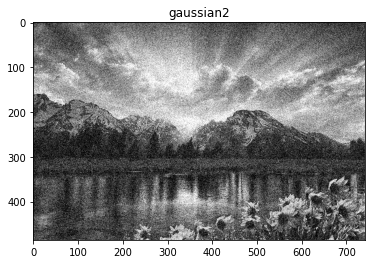

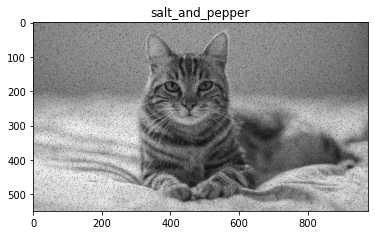

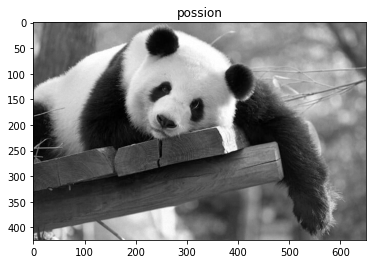

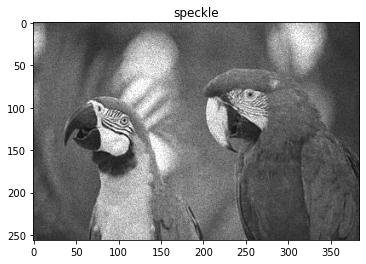

In [4]:
# Add different noise to different images


gaussian_img = noiseAddtion(img,0)
salt_and_pepper_img = noiseAddtion(cat,1)
possion_img = noiseAddtion(panda,2)
speckle_img = noiseAddtion(parrot,3)
gaussian_img2 = noiseAddtion(land,0)

io.imsave("img1.png", gaussian_img)
io.imsave("img2.png", salt_and_pepper_img)
io.imsave("img3.png", possion_img)
io.imsave("img4.png", speckle_img)
io.imsave("img5.png", gaussian_img2)

gaussian_err = Evaluate_MSE(img,gaussian_img)
s_and_p_err = Evaluate_MSE(cat,salt_and_pepper_img)
possion_err = Evaluate_MSE(panda,possion_img)
speckle_err = Evaluate_MSE(parrot,speckle_img)
gaussian_img2_err = Evaluate_MSE(land,gaussian_img2)

plt.imshow(gaussian_img, cmap="gray")
plt.title("gaussian")
plt.show()

plt.imshow(gaussian_img2, cmap="gray")
plt.title("gaussian2")
plt.show()

plt.imshow(salt_and_pepper_img, cmap="gray")
plt.title("salt_and_pepper")
plt.show()


plt.imshow(possion_img, cmap="gray")
plt.title("possion")
plt.show()

plt.imshow(speckle_img, cmap="gray")
plt.title("speckle")
plt.show()


Apply linear denoising method:
* Box filter with size 3,5,7
* Gaussian filter with size 3,5,7

## Test with Possion noise

EMS before denoise: 5.3616389022153964e-05 EMS after denoise for box filter size 3: 16.712963161649533
EMS before denoise: 5.3616389022153964e-05 EMS after denoise for box filter size 5: 149.88057560084687
EMS before denoise: 5.3616389022153964e-05 EMS after denoise for box filter size 7: 597.2935157610557
EMS before denoise: 5.3616389022153964e-05 EMS after denoise for small gaussian filter: 0.00034688509924878964
EMS before denoise: 5.3616389022153964e-05 EMS after denoise for middle gaussian filter: 0.0009658220836021693
EMS before denoise: 5.3616389022153964e-05 EMS after denoise for large gaussian filter: 0.002897287734775288


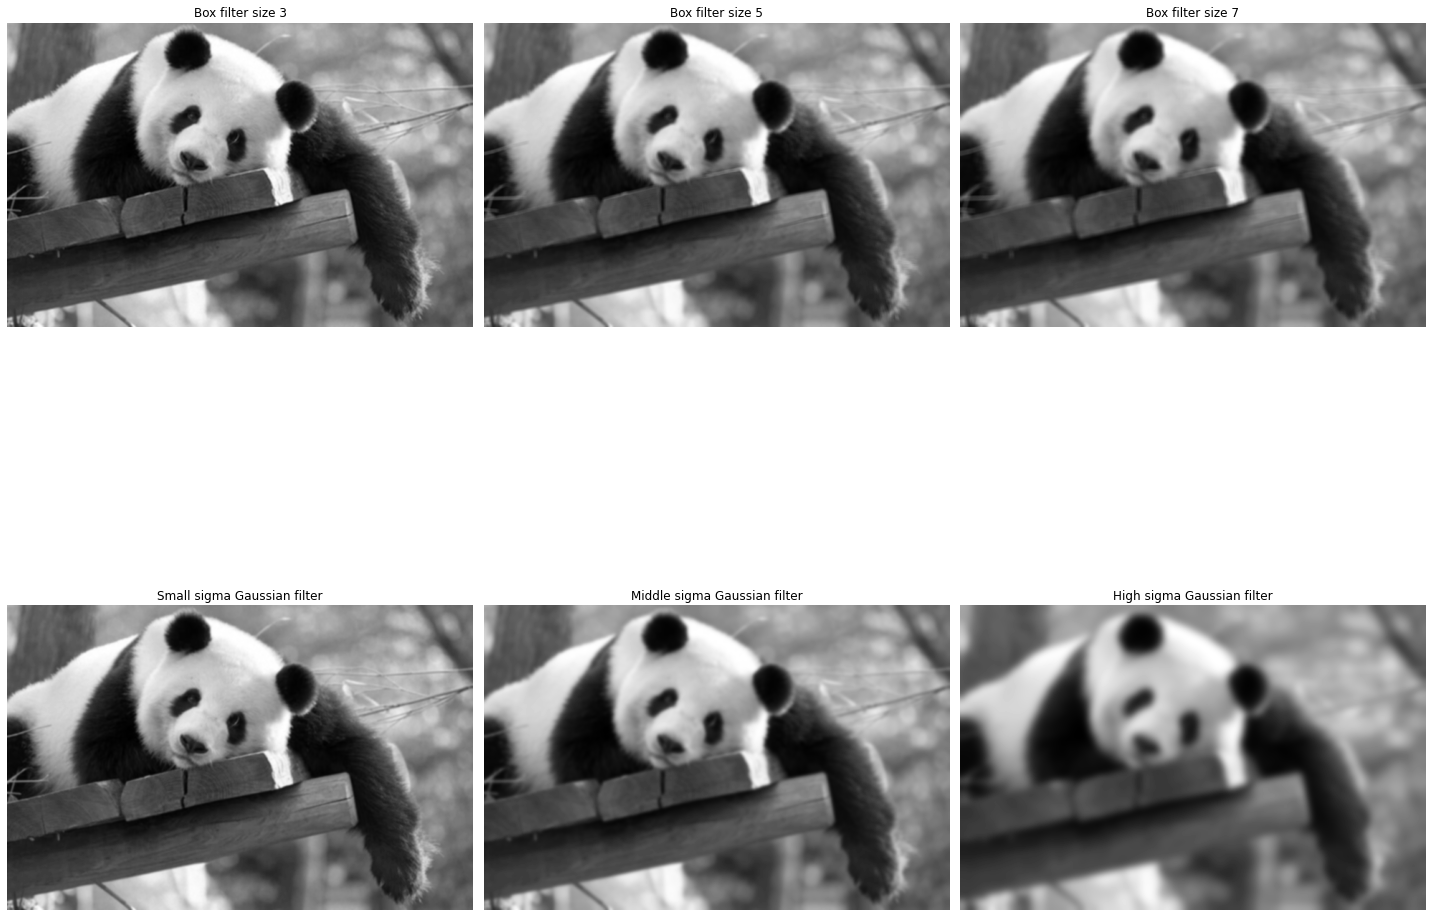

In [23]:
Box_fileter_3 = np.ones(shape=(3,3))
Box_fileter_5 = np.ones(shape=(5,5))
Box_fileter_7 = np.ones(shape=(7,7))

Box_fileter_3_image = correlate_sparse(possion_img, Box_fileter_3, mode='reflect')
print("EMS before denoise: "+str(possion_err)+" EMS after denoise for box filter size 3: "+str(Evaluate_MSE(possion_img,Box_fileter_3_image)))
Box_fileter_5_image = correlate_sparse(possion_img, Box_fileter_5, mode='reflect')
print("EMS before denoise: "+str(possion_err)+" EMS after denoise for box filter size 5: "+str(Evaluate_MSE(possion_img,Box_fileter_5_image)))
Box_fileter_7_image = correlate_sparse(possion_img, Box_fileter_7, mode='reflect')
print("EMS before denoise: "+str(possion_err)+" EMS after denoise for box filter size 7: "+str(Evaluate_MSE(possion_img,Box_fileter_7_image)))

gaussian_filter_1 = gaussian(possion_img, sigma=1, mode='reflect')
print("EMS before denoise: "+str(possion_err)+" EMS after denoise for small gaussian filter: "+str(Evaluate_MSE(possion_img,gaussian_filter_1)))
gaussian_filter_2 = gaussian(possion_img, sigma=2, mode='reflect')
print("EMS before denoise: "+str(possion_err)+" EMS after denoise for middle gaussian filter: "+str(Evaluate_MSE(possion_img,gaussian_filter_2)))
gaussian_filter_3 = gaussian(possion_img, sigma=5, mode='reflect')
print("EMS before denoise: "+str(possion_err)+" EMS after denoise for large gaussian filter: "+str(Evaluate_MSE(possion_img,gaussian_filter_3)))

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 20), sharex=True,
                       sharey=True)

plt.gray()

ax[0, 0].imshow(Box_fileter_3_image)
ax[0, 0].axis('off')
ax[0, 0].set_title('Box filter size 3')
ax[0, 1].imshow(Box_fileter_5_image)
ax[0, 1].axis('off')
ax[0, 1].set_title('Box filter size 5')
ax[0, 2].imshow(Box_fileter_7_image)
ax[0, 2].axis('off')
ax[0, 2].set_title('Box filter size 7')
ax[1, 0].imshow(gaussian_filter_1)
ax[1, 0].axis('off')
ax[1, 0].set_title("Small sigma Gaussian filter")
ax[1, 1].imshow(gaussian_filter_2)
ax[1, 1].axis('off')
ax[1, 1].set_title("Middle sigma Gaussian filter")
ax[1, 2].imshow(gaussian_filter_3)
ax[1, 2].axis('off')
ax[1, 2].set_title("High sigma Gaussian filter")
fig.tight_layout()

plt.show()

## Test with Gaussian noise

EMS before denoise: 0.01907308513738573 EMS after denoise for box filter size 3: 17.31923581114152
EMS before denoise: 0.01907308513738573 EMS after denoise for box filter size 5: 154.15979603093365
EMS before denoise: 0.01907308513738573 EMS after denoise for box filter size 7: 613.1874019313503
EMS before denoise: 0.01907308513738573 EMS after denoise for small gaussian filter: 0.0020434854190399974
EMS before denoise: 0.01907308513738573 EMS after denoise for middle gaussian filter: 0.00189060490971699
EMS before denoise: 0.01907308513738573 EMS after denoise for large gaussian filter: 0.00430449914949012


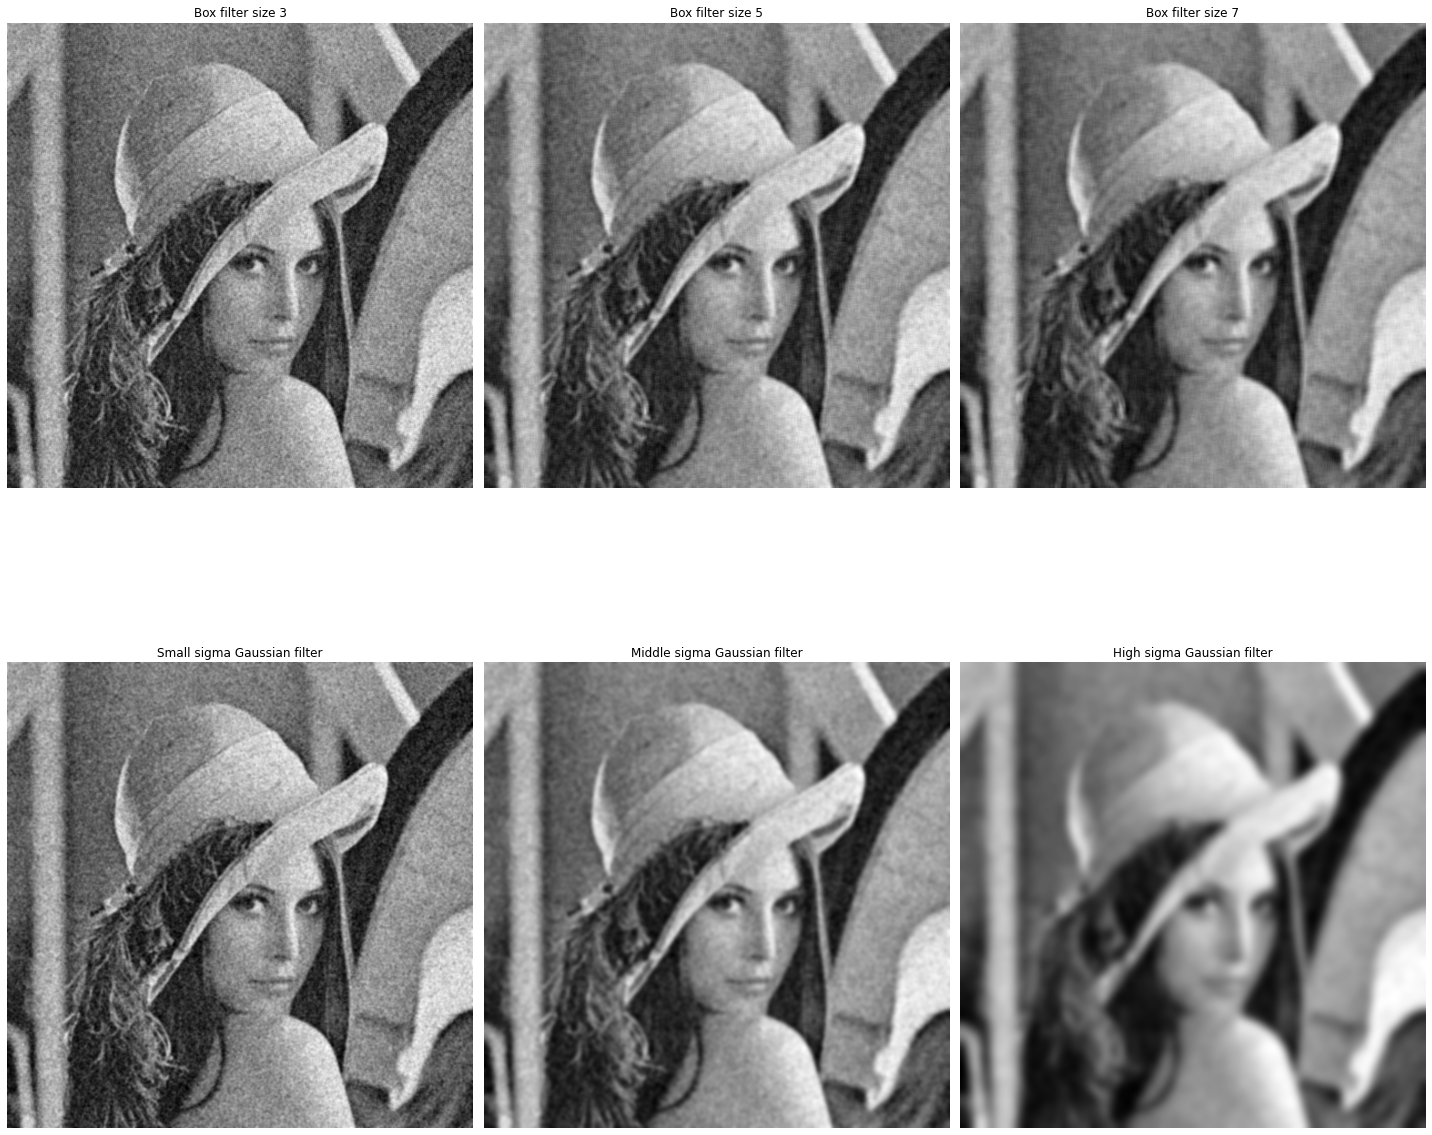

In [24]:
Box_fileter_3 = np.ones(shape=(3,3))
Box_fileter_5 = np.ones(shape=(5,5))
Box_fileter_7 = np.ones(shape=(7,7))

Box_fileter_3_image = correlate_sparse(gaussian_img, Box_fileter_3, mode='reflect')
print("EMS before denoise: "+str(gaussian_err)+" EMS after denoise for box filter size 3: "+str(Evaluate_MSE(img,Box_fileter_3_image)))
Box_fileter_5_image = correlate_sparse(gaussian_img, Box_fileter_5, mode='reflect')
print("EMS before denoise: "+str(gaussian_err)+" EMS after denoise for box filter size 5: "+str(Evaluate_MSE(img,Box_fileter_5_image)))
Box_fileter_7_image = correlate_sparse(gaussian_img, Box_fileter_7, mode='reflect')
print("EMS before denoise: "+str(gaussian_err)+" EMS after denoise for box filter size 7: "+str(Evaluate_MSE(img,Box_fileter_7_image)))

gaussian_filter_1 = gaussian(gaussian_img, sigma=1, mode='reflect')
print("EMS before denoise: "+str(gaussian_err)+" EMS after denoise for small gaussian filter: "+str(Evaluate_MSE(img,gaussian_filter_1)))
gaussian_filter_2 = gaussian(gaussian_img, sigma=2, mode='reflect')
print("EMS before denoise: "+str(gaussian_err)+" EMS after denoise for middle gaussian filter: "+str(Evaluate_MSE(img,gaussian_filter_2)))
gaussian_filter_3 = gaussian(gaussian_img, sigma=5, mode='reflect')
print("EMS before denoise: "+str(gaussian_err)+" EMS after denoise for large gaussian filter: "+str(Evaluate_MSE(img,gaussian_filter_3)))

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 20), sharex=True,
                       sharey=True)

plt.gray()

ax[0, 0].imshow(Box_fileter_3_image)
ax[0, 0].axis('off')
ax[0, 0].set_title('Box filter size 3')
ax[0, 1].imshow(Box_fileter_5_image)
ax[0, 1].axis('off')
ax[0, 1].set_title('Box filter size 5')
ax[0, 2].imshow(Box_fileter_7_image)
ax[0, 2].axis('off')
ax[0, 2].set_title('Box filter size 7')
ax[1, 0].imshow(gaussian_filter_1)
ax[1, 0].axis('off')
ax[1, 0].set_title("Small sigma Gaussian filter")
ax[1, 1].imshow(gaussian_filter_2)
ax[1, 1].axis('off')
ax[1, 1].set_title("Middle sigma Gaussian filter")
ax[1, 2].imshow(gaussian_filter_3)
ax[1, 2].axis('off')
ax[1, 2].set_title("High sigma Gaussian filter")
fig.tight_layout()

plt.show()

## Test with salt and pepper noise

EMS before denoise: 0.01720963345840073 EMS after denoise for box filter size 3: 20.566316513405358
EMS before denoise: 0.01720963345840073 EMS after denoise for box filter size 5: 185.38362072841613
EMS before denoise: 0.01720963345840073 EMS after denoise for box filter size 7: 741.2804978496388
EMS before denoise: 0.01720963345840073 EMS after denoise for small gaussian filter: 0.0021246679083827664
EMS before denoise: 0.01720963345840073 EMS after denoise for middle gaussian filter: 0.0013918536461951215
EMS before denoise: 0.01720963345840073 EMS after denoise for large gaussian filter: 0.0020706466536255753


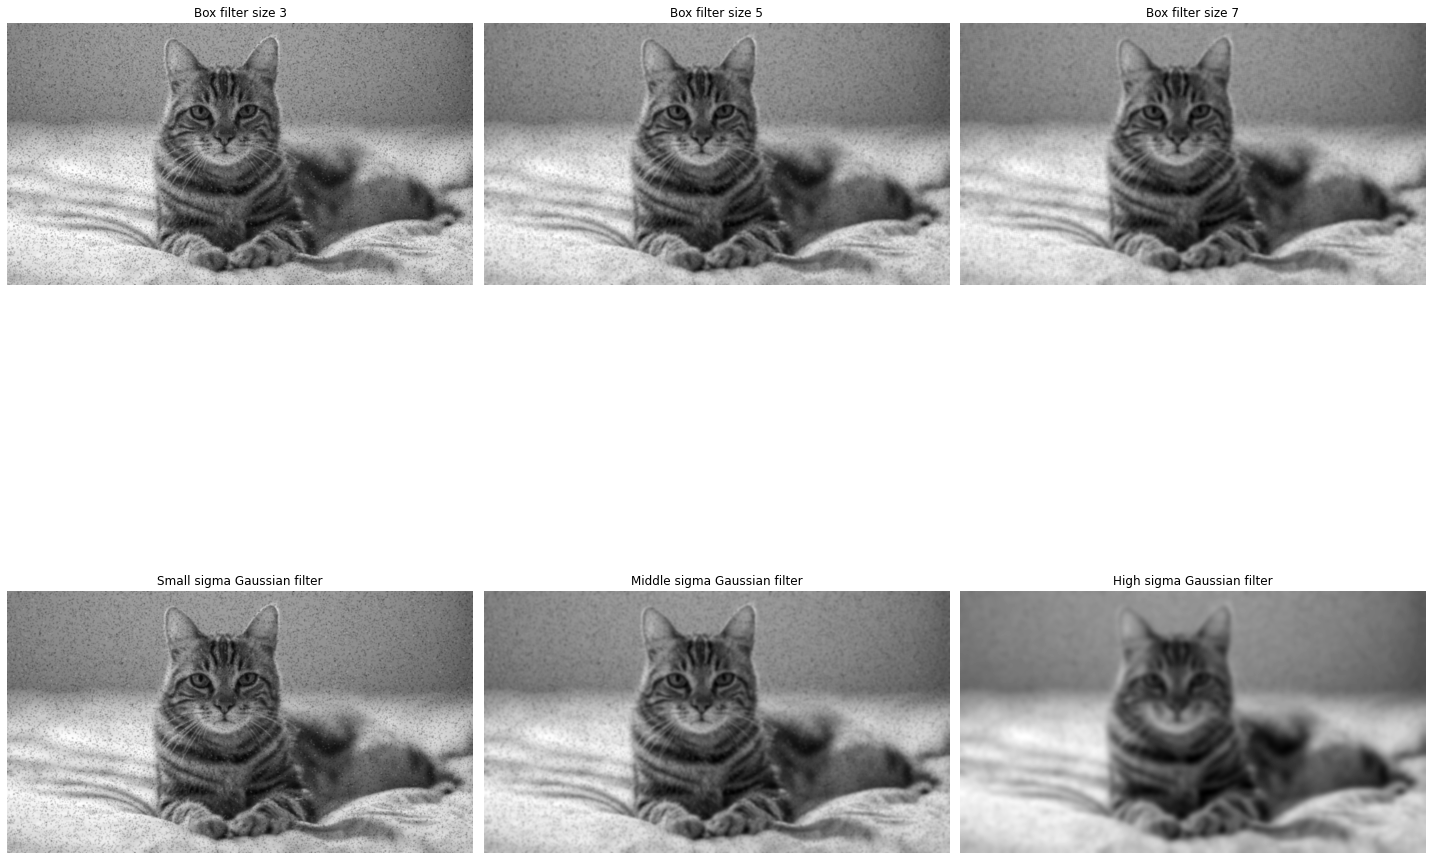

In [25]:
Box_fileter_3 = np.ones(shape=(3,3))
Box_fileter_5 = np.ones(shape=(5,5))
Box_fileter_7 = np.ones(shape=(7,7))

Box_fileter_3_image = correlate_sparse(salt_and_pepper_img, Box_fileter_3, mode='reflect')
print("EMS before denoise: "+str(s_and_p_err)+" EMS after denoise for box filter size 3: "+str(Evaluate_MSE(cat,Box_fileter_3_image)))
Box_fileter_5_image = correlate_sparse(salt_and_pepper_img, Box_fileter_5, mode='reflect')
print("EMS before denoise: "+str(s_and_p_err)+" EMS after denoise for box filter size 5: "+str(Evaluate_MSE(cat,Box_fileter_5_image)))
Box_fileter_7_image = correlate_sparse(salt_and_pepper_img, Box_fileter_7, mode='reflect')
print("EMS before denoise: "+str(s_and_p_err)+" EMS after denoise for box filter size 7: "+str(Evaluate_MSE(cat,Box_fileter_7_image)))

gaussian_filter_1 = gaussian(salt_and_pepper_img, sigma=1, mode='reflect')
print("EMS before denoise: "+str(s_and_p_err)+" EMS after denoise for small gaussian filter: "+str(Evaluate_MSE(cat,gaussian_filter_1)))
gaussian_filter_2 = gaussian(salt_and_pepper_img, sigma=2, mode='reflect')
print("EMS before denoise: "+str(s_and_p_err)+" EMS after denoise for middle gaussian filter: "+str(Evaluate_MSE(cat,gaussian_filter_2)))
gaussian_filter_3 = gaussian(salt_and_pepper_img, sigma=5, mode='reflect')
print("EMS before denoise: "+str(s_and_p_err)+" EMS after denoise for large gaussian filter: "+str(Evaluate_MSE(cat,gaussian_filter_3)))

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 20), sharex=True,
                       sharey=True)

plt.gray()

ax[0, 0].imshow(Box_fileter_3_image)
ax[0, 0].axis('off')
ax[0, 0].set_title('Box filter size 3')
ax[0, 1].imshow(Box_fileter_5_image)
ax[0, 1].axis('off')
ax[0, 1].set_title('Box filter size 5')
ax[0, 2].imshow(Box_fileter_7_image)
ax[0, 2].axis('off')
ax[0, 2].set_title('Box filter size 7')
ax[1, 0].imshow(gaussian_filter_1)
ax[1, 0].axis('off')
ax[1, 0].set_title("Small sigma Gaussian filter")
ax[1, 1].imshow(gaussian_filter_2)
ax[1, 1].axis('off')
ax[1, 1].set_title("Middle sigma Gaussian filter")
ax[1, 2].imshow(gaussian_filter_3)
ax[1, 2].axis('off')
ax[1, 2].set_title("High sigma Gaussian filter")
fig.tight_layout()

plt.show()

## Test with speckle noise

EMS before denoise: 0.002081198918766963 EMS after denoise for box filter size 3: 13.851237757421977
EMS before denoise: 0.002081198918766963 EMS after denoise for box filter size 5: 124.06335223732896
EMS before denoise: 0.002081198918766963 EMS after denoise for box filter size 7: 494.31405757129045
EMS before denoise: 0.002081198918766963 EMS after denoise for small gaussian filter: 0.0008905889380868157
EMS before denoise: 0.002081198918766963 EMS after denoise for middle gaussian filter: 0.001672564141710399
EMS before denoise: 0.002081198918766963 EMS after denoise for large gaussian filter: 0.003527989992459586


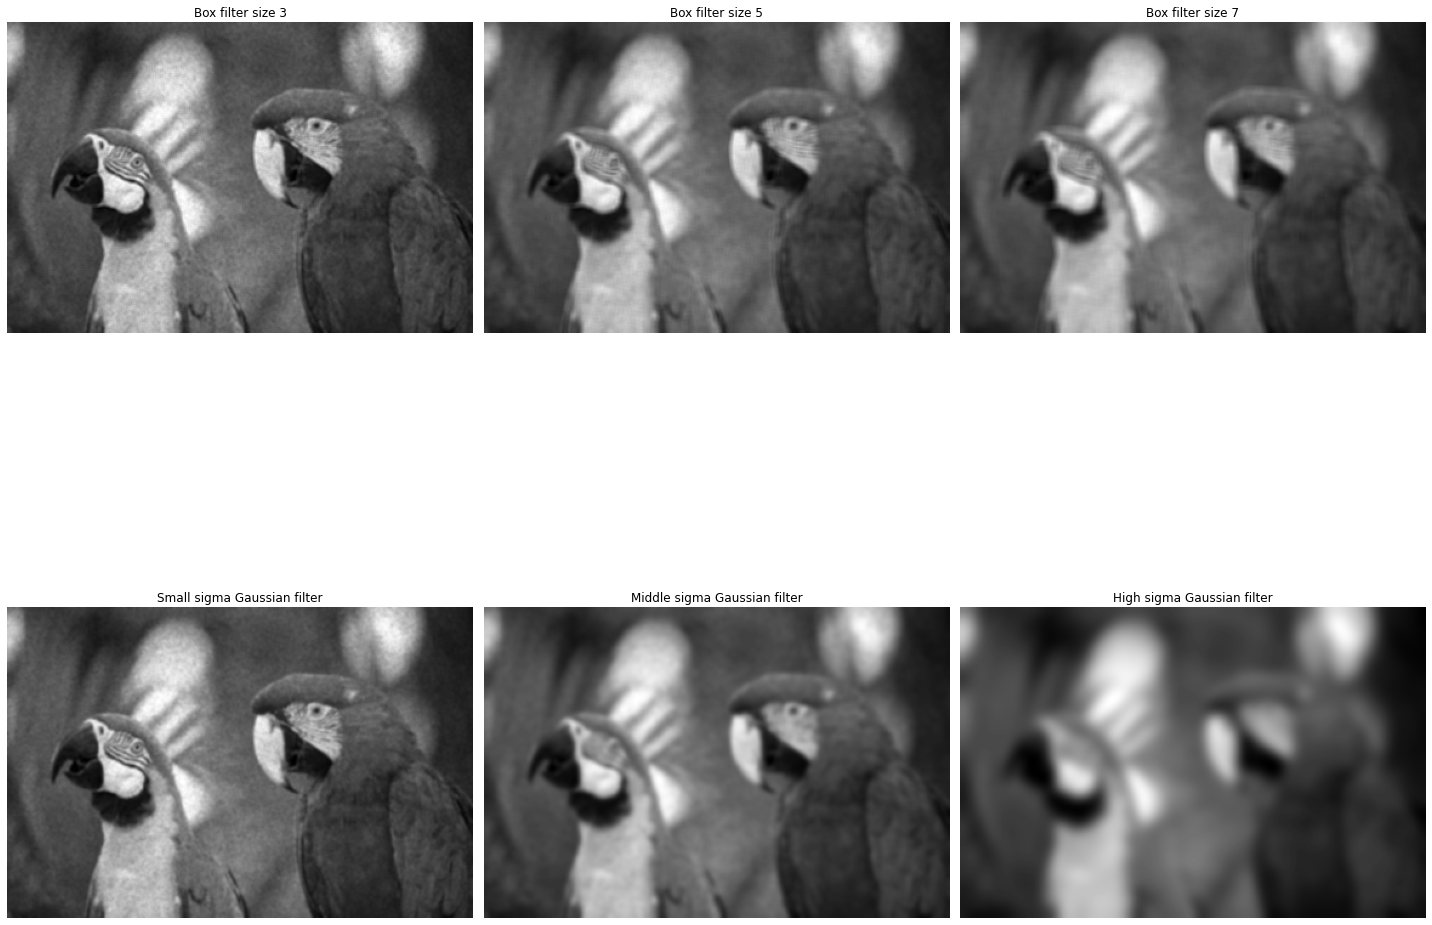

In [26]:
Box_fileter_3 = np.ones(shape=(3,3))
Box_fileter_5 = np.ones(shape=(5,5))
Box_fileter_7 = np.ones(shape=(7,7))

Box_fileter_3_image = correlate_sparse(speckle_img, Box_fileter_3, mode='reflect')
print("EMS before denoise: "+str(speckle_err)+" EMS after denoise for box filter size 3: "+str(Evaluate_MSE(parrot,Box_fileter_3_image)))
Box_fileter_5_image = correlate_sparse(speckle_img, Box_fileter_5, mode='reflect')
print("EMS before denoise: "+str(speckle_err)+" EMS after denoise for box filter size 5: "+str(Evaluate_MSE(parrot,Box_fileter_5_image)))
Box_fileter_7_image = correlate_sparse(speckle_img, Box_fileter_7, mode='reflect')
print("EMS before denoise: "+str(speckle_err)+" EMS after denoise for box filter size 7: "+str(Evaluate_MSE(parrot,Box_fileter_7_image)))

gaussian_filter_1 = gaussian(speckle_img, sigma=1, mode='reflect')
print("EMS before denoise: "+str(speckle_err)+" EMS after denoise for small gaussian filter: "+str(Evaluate_MSE(parrot,gaussian_filter_1)))
gaussian_filter_2 = gaussian(speckle_img, sigma=2, mode='reflect')
print("EMS before denoise: "+str(speckle_err)+" EMS after denoise for middle gaussian filter: "+str(Evaluate_MSE(parrot,gaussian_filter_2)))
gaussian_filter_3 = gaussian(speckle_img, sigma=5, mode='reflect')
print("EMS before denoise: "+str(speckle_err)+" EMS after denoise for large gaussian filter: "+str(Evaluate_MSE(parrot,gaussian_filter_3)))

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 20), sharex=True,
                       sharey=True)

plt.gray()

ax[0, 0].imshow(Box_fileter_3_image)
ax[0, 0].axis('off')
ax[0, 0].set_title('Box filter size 3')
ax[0, 1].imshow(Box_fileter_5_image)
ax[0, 1].axis('off')
ax[0, 1].set_title('Box filter size 5')
ax[0, 2].imshow(Box_fileter_7_image)
ax[0, 2].axis('off')
ax[0, 2].set_title('Box filter size 7')
ax[1, 0].imshow(gaussian_filter_1)
ax[1, 0].axis('off')
ax[1, 0].set_title("Small sigma Gaussian filter")
ax[1, 1].imshow(gaussian_filter_2)
ax[1, 1].axis('off')
ax[1, 1].set_title("Middle sigma Gaussian filter")
ax[1, 2].imshow(gaussian_filter_3)
ax[1, 2].axis('off')
ax[1, 2].set_title("High sigma Gaussian filter")
fig.tight_layout()

plt.show()

## Part2: Experiment with 3 different nonlinear denoising methods, such as bilateral filtering.  If you use a method that was not discussed in class, explain how it works.  As in 1) of this assignment experiment, quantify, and show results for different types and levels of noise, parameters, etc. 

Implement three different nonlinear denoising methods using **Gaussian noise**:
* Bilaternal filtering
* Median filtering
* Nonlocal filtering


EMS before denoise: 0.018372135101040774 EMS after denoise for bilaternal size 5: 0.0036466916969566747
EMS before denoise: 0.018372135101040774 EMS after denoise for bilaternal size 7: 0.0035605043671295008
EMS before denoise: 0.018372135101040774 EMS after denoise for bilaternal size 11: 0.0038476166862421164
EMS before denoise: 0.018372135101040774 EMS after denoise for non-loacl mean size 3: 0.00443853525677697
EMS before denoise: 0.018372135101040774 EMS after denoise for non-loacl mean size 5: 0.003823941440417137
EMS before denoise: 0.018372135101040774 EMS after denoise for non-loacl mean size 7: 0.004444859658349459
EMS before denoise: 0.018372135101040774 EMS after denoise for median filter ndimage: 0.005312867512294546
EMS before denoise: 0.018372135101040774 EMS after denoise for median filter rank: 0.005312867512294546


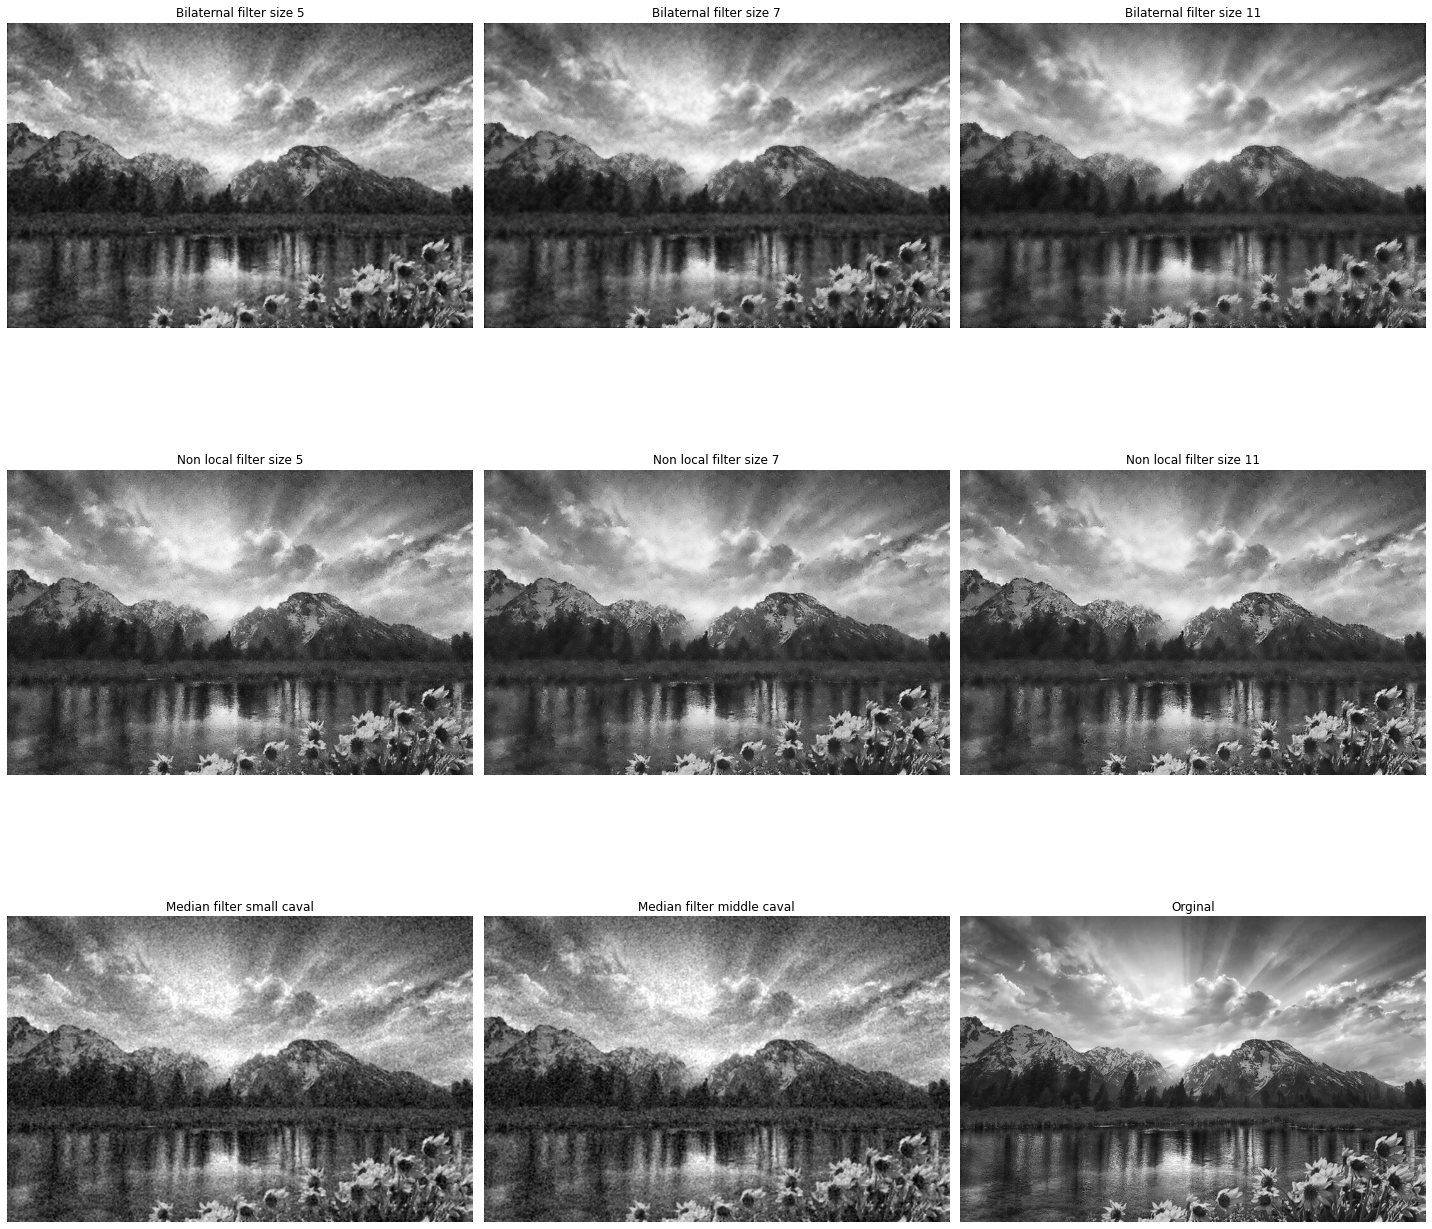

In [27]:
from skimage.restoration import denoise_nl_means, denoise_bilateral
# bilaternal filtering
bilaternal_5 = denoise_bilateral(gaussian_img2,win_size = 5, sigma_spatial=15)
bilaternal_7 = denoise_bilateral(gaussian_img2,win_size = 7, sigma_spatial=15)
bilaternal_11 = denoise_bilateral(gaussian_img2,win_size = 11, sigma_spatial=15)

print("EMS before denoise: "+str(gaussian_img2_err)+" EMS after denoise for bilaternal size 5: "+str(Evaluate_MSE(land,bilaternal_5)))
print("EMS before denoise: "+str(gaussian_img2_err)+" EMS after denoise for bilaternal size 7: "+str(Evaluate_MSE(land,bilaternal_7)))
print("EMS before denoise: "+str(gaussian_img2_err)+" EMS after denoise for bilaternal size 11: "+str(Evaluate_MSE(land,bilaternal_11)))

# non-local mean
non_local_5 = denoise_nl_means(gaussian_img2, patch_size=3, patch_distance=5, fast_mode=True)
non_local_7 = denoise_nl_means(gaussian_img2, patch_size=5, patch_distance=5, fast_mode=True)
non_local_11 = denoise_nl_means(gaussian_img2, patch_size=7, patch_distance=5, fast_mode=True)

print("EMS before denoise: "+str(gaussian_img2_err)+" EMS after denoise for non-loacl mean size 3: "+str(Evaluate_MSE(land,non_local_5)))
print("EMS before denoise: "+str(gaussian_img2_err)+" EMS after denoise for non-loacl mean size 5: "+str(Evaluate_MSE(land,non_local_7)))
print("EMS before denoise: "+str(gaussian_img2_err)+" EMS after denoise for non-loacl mean size 7: "+str(Evaluate_MSE(land,non_local_11)))

# median filtering
median_filter_scval = median(gaussian_img2, mode='nearest', behavior='ndimage')
median_filter_mcval = median(gaussian_img2, mode='nearest', behavior='ndimage', cval=2.0)

print("EMS before denoise: "+str(gaussian_img2_err)+" EMS after denoise for median filter ndimage: "+str(Evaluate_MSE(land,median_filter_scval)))
print("EMS before denoise: "+str(gaussian_img2_err)+" EMS after denoise for median filter rank: "+str(Evaluate_MSE(land,median_filter_mcval)))

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 20), sharex=True,
                       sharey=True)

plt.gray()

ax[0, 0].imshow(bilaternal_5)
ax[0, 0].axis('off')
ax[0, 0].set_title('Bilaternal filter size 5')
ax[0, 1].imshow(bilaternal_7)
ax[0, 1].axis('off')
ax[0, 1].set_title('Bilaternal filter size 7')
ax[0, 2].imshow(bilaternal_11)
ax[0, 2].axis('off')
ax[0, 2].set_title('Bilaternal filter size 11')

ax[1, 0].imshow(non_local_5)
ax[1, 0].axis('off')
ax[1, 0].set_title("Non local filter size 5")
ax[1, 1].imshow(non_local_7)
ax[1, 1].axis('off')
ax[1, 1].set_title("Non local filter size 7")
ax[1, 2].imshow(non_local_11)
ax[1, 2].axis('off')
ax[1, 2].set_title("Non local filter size 11")

ax[2, 0].imshow(median_filter_scval)
ax[2, 0].axis('off')
ax[2, 0].set_title("Median filter small caval")
ax[2, 1].imshow(median_filter_mcval)
ax[2, 1].axis('off')
ax[2, 1].set_title("Median filter middle caval")
ax[2, 2].imshow(land)
ax[2, 2].axis('off')
ax[2, 2].set_title("Orginal")
fig.tight_layout()

plt.show()

Implement three different nonlinear denoising methods using **Salt and Pepper noise**:
* Bilaternal filtering
* Median filtering
* Nonlocal filtering

EMS before denoise: 0.01720963345840073 EMS after denoise for bilaternal size 5: 0.011790720527019983
EMS before denoise: 0.01720963345840073 EMS after denoise for bilaternal size 7: 0.011223987206317454
EMS before denoise: 0.01720963345840073 EMS after denoise for bilaternal size 11: 0.010973046711876776
EMS before denoise: 0.01720963345840073 EMS after denoise for non-loacl mean size 3: 0.012813121800777566
EMS before denoise: 0.01720963345840073 EMS after denoise for non-loacl mean size 5: 0.006378689231570316
EMS before denoise: 0.01720963345840073 EMS after denoise for non-loacl mean size 7: 0.0057091228213300566
EMS before denoise: 0.01720963345840073 EMS after denoise for median filter ndimage: 8.237303002786436e-05
EMS before denoise: 0.01720963345840073 EMS after denoise for median filter rank: 8.237303002786436e-05


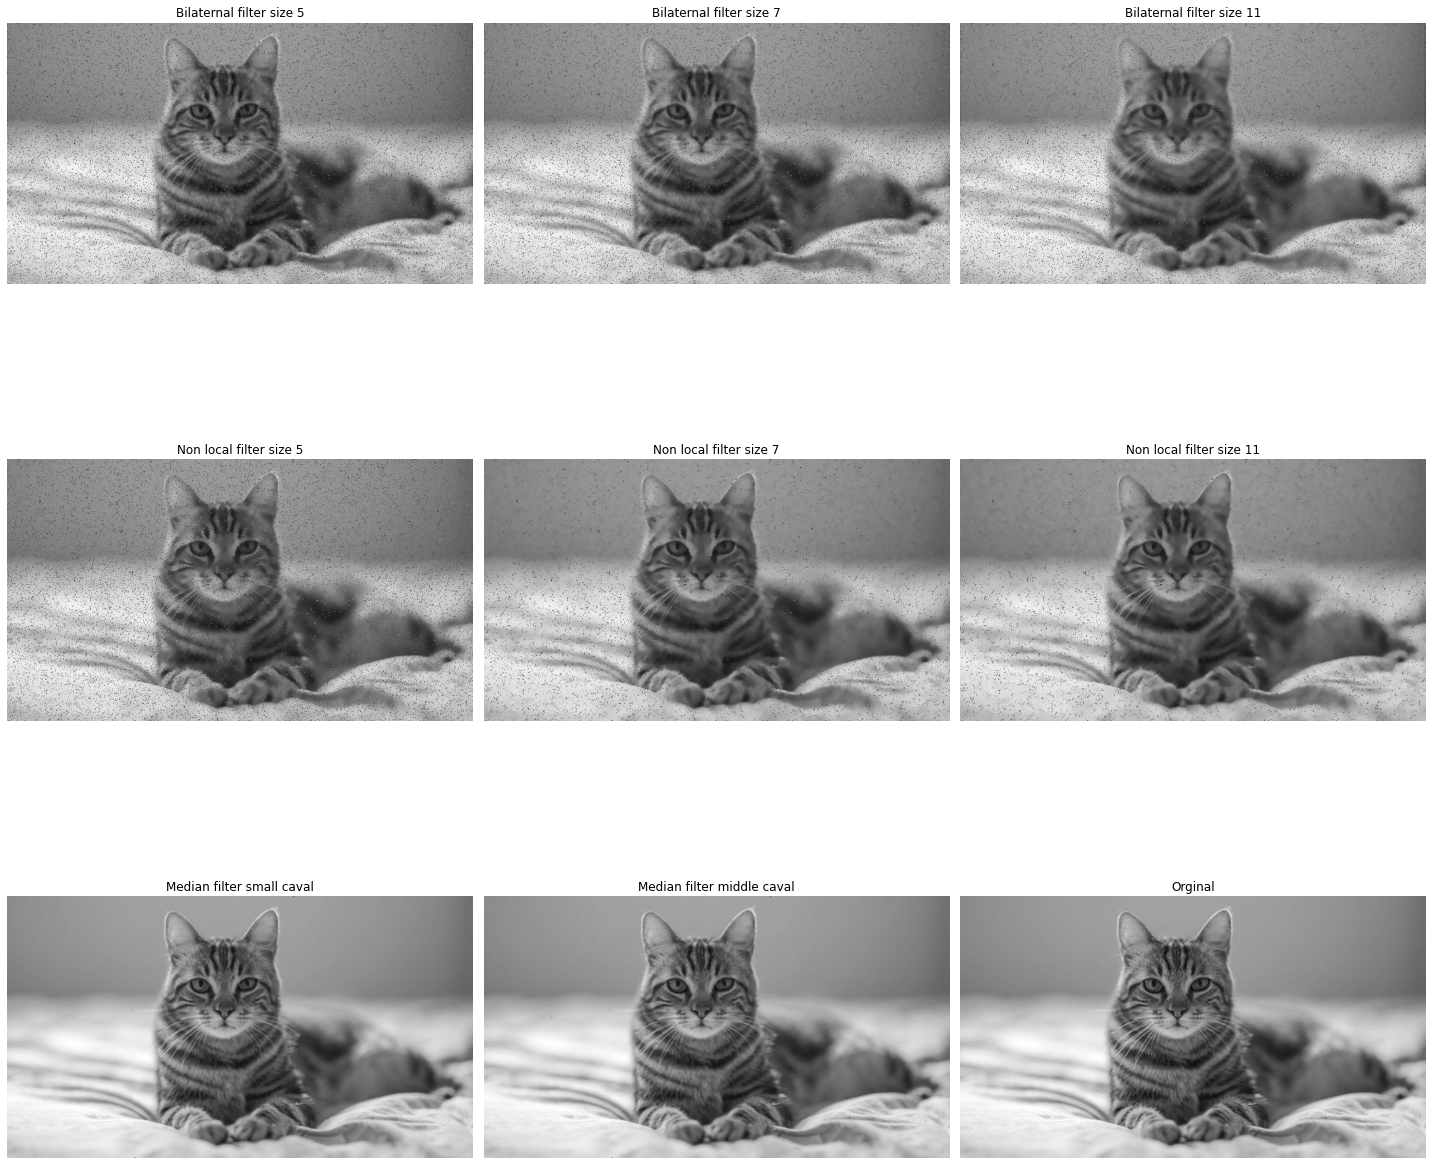

In [28]:
from skimage.restoration import denoise_nl_means, denoise_bilateral
# bilaternal filtering
bilaternal_5 = denoise_bilateral(salt_and_pepper_img,win_size = 5, sigma_spatial=15)
bilaternal_7 = denoise_bilateral(salt_and_pepper_img,win_size = 7, sigma_spatial=15)
bilaternal_11 = denoise_bilateral(salt_and_pepper_img,win_size = 11, sigma_spatial=15)

print("EMS before denoise: "+str(s_and_p_err)+" EMS after denoise for bilaternal size 5: "+str(Evaluate_MSE(cat,bilaternal_5)))
print("EMS before denoise: "+str(s_and_p_err)+" EMS after denoise for bilaternal size 7: "+str(Evaluate_MSE(cat,bilaternal_7)))
print("EMS before denoise: "+str(s_and_p_err)+" EMS after denoise for bilaternal size 11: "+str(Evaluate_MSE(cat,bilaternal_11)))

# non-local mean
non_local_5 = denoise_nl_means(salt_and_pepper_img, patch_size=3, patch_distance=5, fast_mode=True)
non_local_7 = denoise_nl_means(salt_and_pepper_img, patch_size=5, patch_distance=5, fast_mode=True)
non_local_11 = denoise_nl_means(salt_and_pepper_img, patch_size=7, patch_distance=5, fast_mode=True)

print("EMS before denoise: "+str(s_and_p_err)+" EMS after denoise for non-loacl mean size 3: "+str(Evaluate_MSE(cat,non_local_5)))
print("EMS before denoise: "+str(s_and_p_err)+" EMS after denoise for non-loacl mean size 5: "+str(Evaluate_MSE(cat,non_local_7)))
print("EMS before denoise: "+str(s_and_p_err)+" EMS after denoise for non-loacl mean size 7: "+str(Evaluate_MSE(cat,non_local_11)))

# median filtering
median_filter_scval = median(salt_and_pepper_img, mode='nearest', behavior='ndimage')
median_filter_mcval = median(salt_and_pepper_img, mode='nearest', behavior='ndimage', cval=2.0)

print("EMS before denoise: "+str(s_and_p_err)+" EMS after denoise for median filter ndimage: "+str(Evaluate_MSE(cat,median_filter_scval)))
print("EMS before denoise: "+str(s_and_p_err)+" EMS after denoise for median filter rank: "+str(Evaluate_MSE(cat,median_filter_mcval)))

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 20), sharex=True,
                       sharey=True)

plt.gray()

ax[0, 0].imshow(bilaternal_5)
ax[0, 0].axis('off')
ax[0, 0].set_title('Bilaternal filter size 5')
ax[0, 1].imshow(bilaternal_7)
ax[0, 1].axis('off')
ax[0, 1].set_title('Bilaternal filter size 7')
ax[0, 2].imshow(bilaternal_11)
ax[0, 2].axis('off')
ax[0, 2].set_title('Bilaternal filter size 11')

ax[1, 0].imshow(non_local_5)
ax[1, 0].axis('off')
ax[1, 0].set_title("Non local filter size 5")
ax[1, 1].imshow(non_local_7)
ax[1, 1].axis('off')
ax[1, 1].set_title("Non local filter size 7")
ax[1, 2].imshow(non_local_11)
ax[1, 2].axis('off')
ax[1, 2].set_title("Non local filter size 11")

ax[2, 0].imshow(median_filter_scval)
ax[2, 0].axis('off')
ax[2, 0].set_title("Median filter small caval")
ax[2, 1].imshow(median_filter_mcval)
ax[2, 1].axis('off')
ax[2, 1].set_title("Median filter middle caval")
ax[2, 2].imshow(cat)
ax[2, 2].axis('off')
ax[2, 2].set_title("Orginal")
fig.tight_layout()

plt.show()

# Summary 
In general, linear filter performs really bad on all kinds of noise. But gaussian filter perform better than the box filter. For each denoise method, parameter is an important thing. With the parameter (kernel size in this case) increased, the MSE decreased. But when the size reaches a certain point, the MSE will increase again. So there exist a optimal parameter.

Non-linear filter performs better than the linear filter for all kinds of noise. Specifically, median filter performs best on the salt and pepper noise. As you can see in the previous image, the median filter image is almost the same as the orginal one. But the median filter doesn't work well with the gaussian noise. The bilaternal method and non-local mean work well for the gaussian noise. 